# Logistic Regression Theory

## Definition:
Logistic Regression is a classification model. In Binary classsification(where output or label or taget variable is either 0 or 1) defines the probability of success as a sigmoid function of linear combination of independent variables or features. Univariate logistic regression has one independent variables and multivariate logistic regression has more than one independent variables

## Assumptions:
1. Linear relationship between independent variables and log probability of the dependent variable
2. No multicollinearity between independent variables
3. no autocorrelation of residuals
4. No influence by the outliers
5. Sample size >50

## Reasons why Linear Regression does not work with Binary classification:
Assumptions of Linear regression model like Homoscedasticity and Normality of Error terms are violated in Binary classification


## WHY LOGIT FUNCTION :
$P_{i}$ =$\beta_{0}$+$\beta_{1}$X   : if X is value increases then $P_{i}$ value increases ,since probability has to be between 0 and 1  there is a need for limiting the values 
Hence instead of Probability, odds is considered ie: odds=$P_{i}$/1- $P_{i}$.Taking log will limit the values between 0 and 1

## Logistic Regression Mathematical model:
### Z=$ln( P(y)/1-P(y))$ =$ln(ods)$= $\beta_{0}$+$\beta_{1}$X1+ $\beta_{2}$X2+. . .+$\beta_{n}$Xn
### sigmoid function is $P(X)=$  $ \sigma=$ 1/1+$e^{-Z}$=$e^{Z}$/1+$e^{Z}$
### $P(X)=$ =$e^{\beta_{0}+\beta_{1}X1}$/1+$e^{\beta_{0}+\beta_{1}X1}$

### $P(X)$/$1-P(X)$ = [$e^{Z}$/1+$e^{Z}$]/ (1+[$e^{Z}$/1-$e^{Z}$]) = $e^{Z}$
### ln($P(X)$/$1-P(X)$)=Z =$\beta_{0}$+$\beta_{1}$X

## Cost Function (why not MSE):
Due to sigmoid function logistic regression prediction is non linear, squaring the prediction (like MSE) results in a non-convex functions with many local minimums.  It is then difficult to find optimal global minimum . Another reason is in classification problems, we have target values like 0/1, So (Ŷ-Y)2 will always be in between 0-1 which can make it very difficult to keep track of the errors and it is difficult to store high precision floating numbers.
(https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#binary-logistic-regression)
https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/

#### Cost Function of Logistic Regression: 
Instead of MSE , cross-entropy also known as log-loss is used .
![ng_cost_function_logistic.png](attachment:ng_cost_function_logistic.png)

Benefit of taking logarithm is that cost function graphs for y-1 and y=0 makes it easy to calculate the gradient and minimize cost. Here m is no of samples
Log Loss is the negative average of the log of corrected predicted probabilities for each instance.



![image.png](attachment:image.png)

h(x) is the prediction plotted against loss function. For y=1 if the prediction is 1 then it is the correction prediction and loss is minimum. If prediction is 0 or anything less than 1 then loss or error increases. So for wrong predictions loss is more.

![logistic_cost_function_joined.png](attachment:logistic_cost_function_joined.png)
To negate the -ve sign another -ve is taken. This is the combined function to show both the class predictions ie y=0 and y=1

### Regularization:
L (Lasso), L2( Ridge)
![1-vwhvjVQiEgLcssUPX6vxig.png](attachment:1-vwhvjVQiEgLcssUPX6vxig.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

### Multinomial Logistics Regression( Number of Labels >2)
Many times, there are classification problems where the number of classes is greater than 2. We can extend Logistic regression for multi-class classification. The logic is simple; we train our logistic model for each class and calculate the probability(hθx) that a specific feature belongs to that class. Once we have trained the model for all the classes, we predict a new value’s class by choosing that class for which the probability(hθx) is maximum. Although we have libraries that we can use to perform multinomial logistic regression, we rarely use logistic regression for classification problems where the number of classes is more than 2. There are many other classification models for such scenarios. We will see more of that in the coming lectures.

## Metrics
1. Accuracy score- not sufficient if unbalanced dataset
2. F1-Score: Harmonic mean of Precion and Recall
3. AUC-ROC Curve- TPR Vs FPR (1-specificity) curve 

## Problem Statement

It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairsDescription of Variables

### Problem Statement Definition : Predict whether women has extramarital affair or not (Binary classification problem. Convert the continuous number in affair column to Binary value.

## Dataset description:-
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,f1_score,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import zscore
%matplotlib inline

In [2]:
data = sm.datasets.fair.load_pandas().data


In [3]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
data['affair']=np.where(data.affairs >0,1,0)

In [5]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
data.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [8]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.000000,5.000000
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.000000,42.000000
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.500000,23.000000
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.000000,5.500000
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.000000,4.000000
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.000000,20.000000
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.000000,6.000000
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.000000,6.000000
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991
affair,6366.0,0.322495,0.467468,0.0,0.0,0.0,1.000000,1.000000


In [10]:
data.drop('affairs',inplace=True,axis=1)

In [11]:
data_copy=data.copy()

In [12]:
#reference:https://www.kite.com/python
z_scores = zscore(data)
#calculate z-scores of data

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

new_data = data[filtered_entries]


In [13]:
filtered_entries

array([ True,  True,  True, ...,  True,  True,  True])

In [14]:
data.shape

(6366, 9)

In [15]:
new_data.shape

(6267, 9)

In [16]:
new_data['affair'].value_counts()

0    4288
1    1979
Name: affair, dtype: int64

Imbalanced dataset

In [17]:
new_data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affair             0
dtype: int64

In [18]:
new_data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

## Exploratory Data Analysis

C:\Users\Jhv\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jhv\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jhv\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

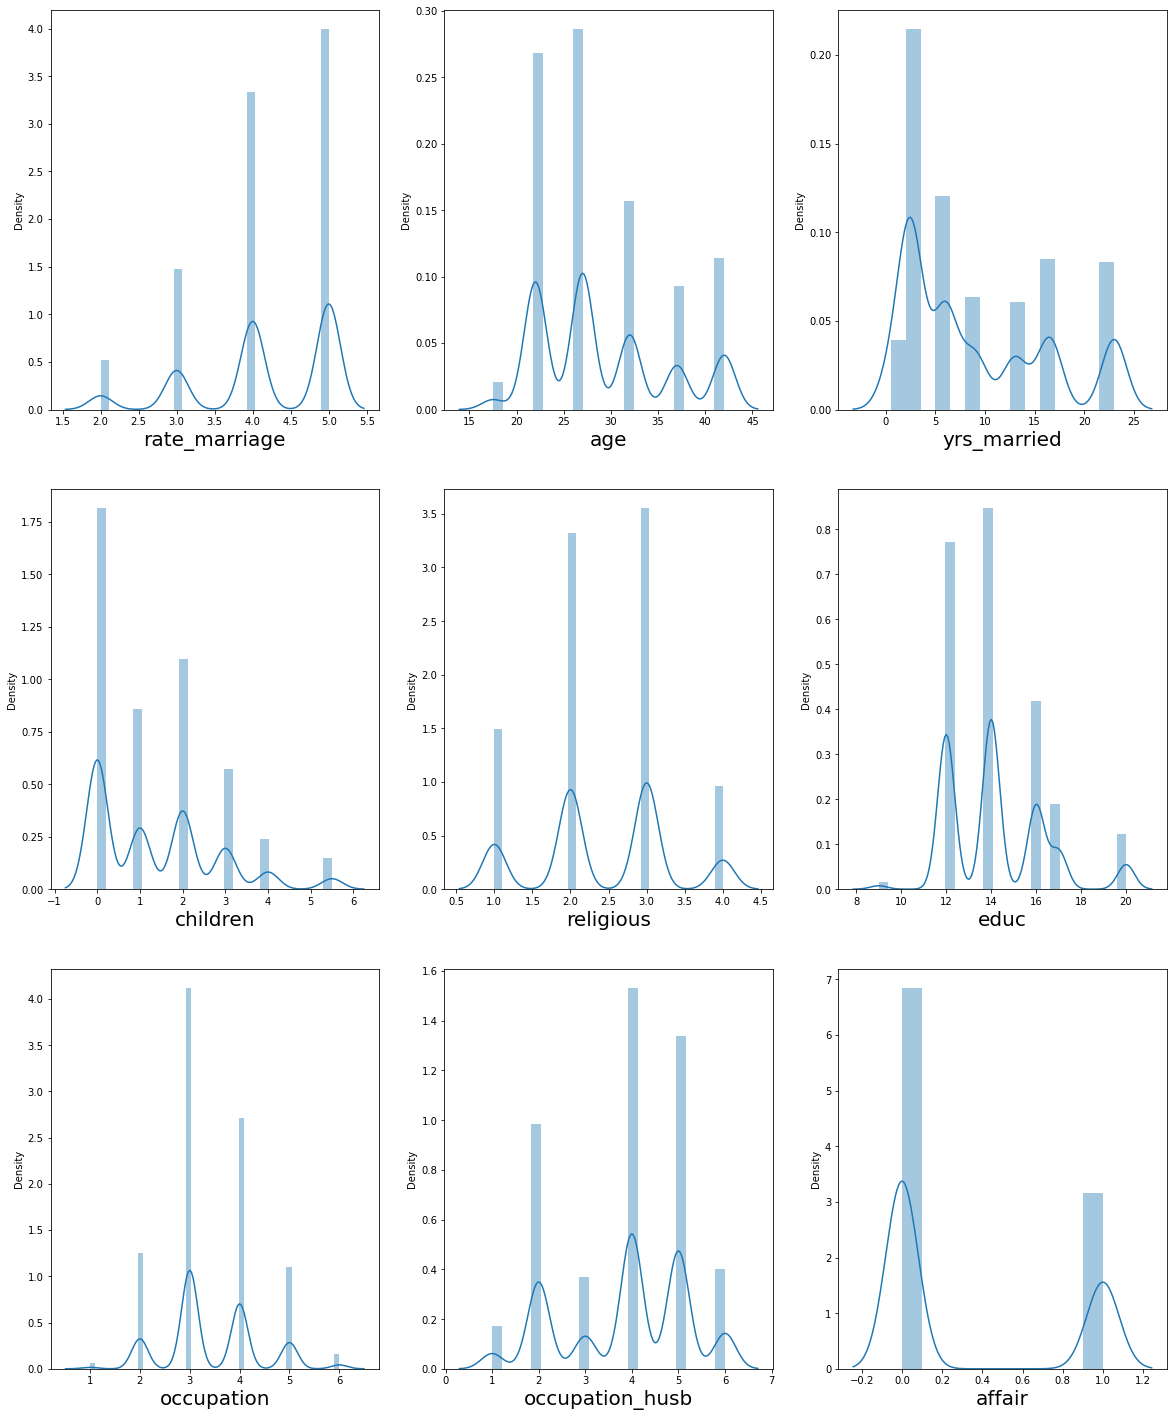

In [19]:
plt.figure(figsize=(20,25))
figno=0
for column in new_data.columns:
    ax=plt.subplot(3,3,figno+1)
    sns.distplot(new_data[column])
    plt.xlabel(column,fontsize=20)
    figno+=1
    
plt.show()
    

<AxesSubplot:>

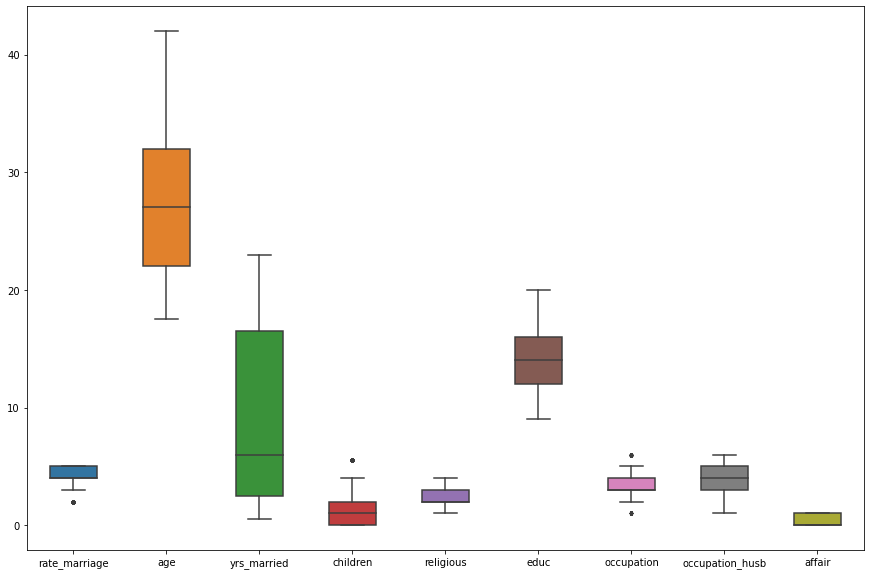

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_data, width= 0.5,ax=ax,  fliersize=3)


rate_marriage, children, occupation have outliers

## Outlier removal

In [21]:
X = data.drop(columns = ['affair'])
y = data['affair']

In [22]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
         1.28115287e+00, -1.51129246e+00,  8.54069123e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -4.50087100e-01,  8.54069123e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -9.63641611e-02, -4.50087100e-01, -2.11697133e+00],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -1.51129246e+00,  1.11309009e-01]])

In [23]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


In [24]:
data_final=new_data.drop(columns=['affair','age','yrs_married'])
data_final.columns

Index(['rate_marriage', 'children', 'religious', 'educ', 'occupation',
       'occupation_husb'],
      dtype='object')

In [25]:
X_new=data_final
y=new_data['affair']

In [26]:
X_new_scaled=scalar.fit_transform(X_new)


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_new_scaled,y, test_size= 0.25, random_state = 58)

In [28]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [40]:
!pip install scikit-learn==0.23.1
!pip install imbalanced-learn==0.7.0

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Jhv\\Anaconda3\\Lib\\site-packages\\sklearn\\~_check_build\\_check_build.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0


In [41]:
import imblearn
from imblearn.over_sampling import SMOTE

In [45]:

!pip install --upgrade scikit-learn
!pip install --upgrade imblearn

In [47]:

oversampling=SMOTE(random_state=58)
X_oversample,y_oversample=oversampling.fit_resample(X_train,y_train)


In [48]:
X_oversample.shape

(6452, 6)

In [49]:
y_oversample.shape

(6452,)

In [50]:
log_reg = LogisticRegression()

log_reg.fit(X_oversample,y_oversample)

LogisticRegression()

In [51]:
y_pred = log_reg.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6675175494575623

In [53]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[744, 318],
       [203, 302]], dtype=int64)

In [54]:
matrix=classification_report(y_test,y_pred)
print("Classificatin report\n",matrix)

Classificatin report
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1062
           1       0.49      0.60      0.54       505

    accuracy                           0.67      1567
   macro avg       0.64      0.65      0.64      1567
weighted avg       0.69      0.67      0.67      1567



In [55]:
lr_roc_auc=roc_auc_score(y_test,log_reg.predict(X_test))
print("AUC_ROC score",lr_roc_auc)
fpr,tpr,thresholds=roc_curve(y_test,log_reg.predict_proba(X_test)[:,1])

AUC_ROC score 0.6492923868658051


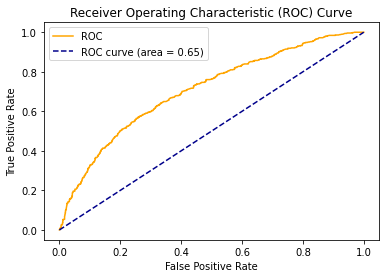

In [56]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % lr_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Method2: using recursive feature elimination technique

In [57]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [58]:
X1=data.loc[:,data.columns!='affair']
y1=data.loc[:,data.columns=='affair']

In [59]:
X1_new_scaled=scalar.fit_transform(X1)


In [60]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1_new_scaled,y1,test_size=0.3,random_state=0)
over_sampling=SMOTE(random_state=0)
columns=X1.columns
over_sample_X,over_sample_y=over_sampling.fit_resample(X1_train,y1_train)
over_sample_X=pd.DataFrame(data=over_sample_X,columns=columns)
over_sample_y=pd.DataFrame(data=over_sample_y,columns=['affair'])

In [72]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

In [61]:
data_vars=data.columns.values.tolist()
y=['affair']
X=[i for i in data_vars if i not in y]
from sklearn.feature_selection import RFE
logreg=LogisticRegression()
rfe=RFE(logreg,6)
rfe=rfe.fit(over_sample_X,over_sample_y)
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True False  True  True  True False]
[1 1 1 2 1 1 1 3]


C:\Users\Jhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Jhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Jhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Jhv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [62]:
over_sample_X.drop(over_sample_X.columns[np.where(rfe.support_==False)[0]],axis=1,inplace=True)

In [63]:
over_sample_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6020 entries, 0 to 6019
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rate_marriage  6020 non-null   float64
 1   age            6020 non-null   float64
 2   yrs_married    6020 non-null   float64
 3   religious      6020 non-null   float64
 4   educ           6020 non-null   float64
 5   occupation     6020 non-null   float64
dtypes: float64(6)
memory usage: 282.3 KB


In [64]:
X=over_sample_X
y=over_sample_y['affair']

In [73]:
scaler=StandardScaler()

In [74]:
X=scaler.fit_transform(X)

In [75]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.3,random_state=0)
lgreg=LogisticRegression()
lgreg.fit(X1_train,y1_train)

LogisticRegression()

In [76]:
y_pred1=lgreg.predict(X1_test)

In [77]:
print("Accuracy",lgreg.score(X1_test,y1_test))

Accuracy 0.6882613510520488


In [78]:
confusion_matrix(y1_test,y_pred1)

array([[631, 286],
       [277, 612]], dtype=int64)

In [79]:
matrix=classification_report(y1_test,y_pred1)
print("Classificatin report\n",matrix)

Classificatin report
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       917
           1       0.68      0.69      0.68       889

    accuracy                           0.69      1806
   macro avg       0.69      0.69      0.69      1806
weighted avg       0.69      0.69      0.69      1806



f1-score improved

In [80]:
lr_roc_auc1=roc_auc_score(y1_test,lgreg.predict(X1_test))
print("AUC_ROC score",lr_roc_auc1)
fpr1,tpr1,thresholds1=roc_curve(y1_test,lgreg.predict_proba(X1_test)[:,1])

AUC_ROC score 0.6882636807803605


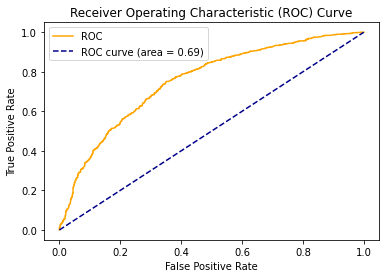

In [81]:
plt.plot(fpr1, tpr1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % lr_roc_auc1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [83]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(lgreg,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [84]:
pickle.dump(lgreg, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))